## 4.1 Credit card fraud detection
 - Using unsupervised learing: Not enough fraud data for supervised learning (and data is outdated)
 - Data: Total transaction: 284,807 /  Fraud transaction: 492 (lable: 1)
 - Feature: 30 (principal components: 28)
 - Split: Train: 190,280 (fraud: 330) / Test: 93,987 (fraud: 162)

In [1]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
data = pd.read_csv("datasets/credit_card_data/credit_card.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Describe data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Count total fraud
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


<AxesSubplot: >

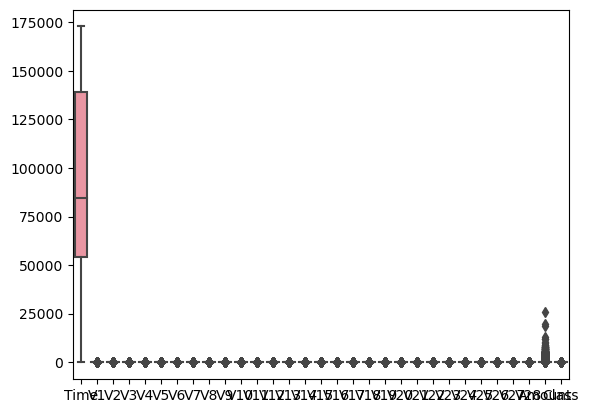

In [6]:
sns.boxplot(data=data)

In [7]:
'''Data Prep'''

dataX = data.drop(['Class'],axis=1)
dataY = data.loc[:,'Class'].copy()

# stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지 (classification에 중요)
X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                    random_state=2018, stratify=dataY)
    
featuresToScale = X_train.columns
sX = pp.StandardScaler(copy=True)
X_train.loc[:,featuresToScale] = sX.fit_transform(X_train.loc[:,featuresToScale])
X_test.loc[:,featuresToScale] = sX.transform(X_test.loc[:,featuresToScale])

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(190820, 30) (93987, 30) (190820,) (93987,)


<AxesSubplot: >

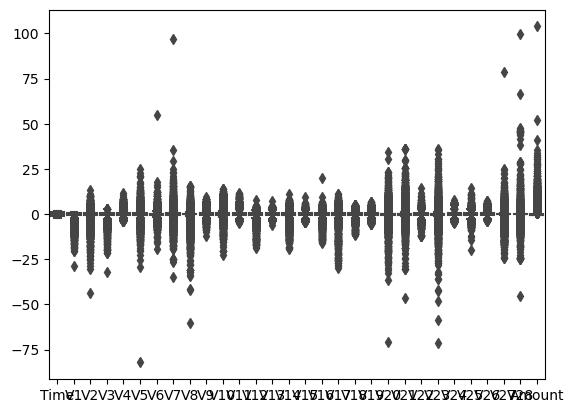

In [9]:
sns.boxplot(data=X_train)

<AxesSubplot: title={'center': 'After Scaling'}, xlabel='Time', ylabel='Density'>

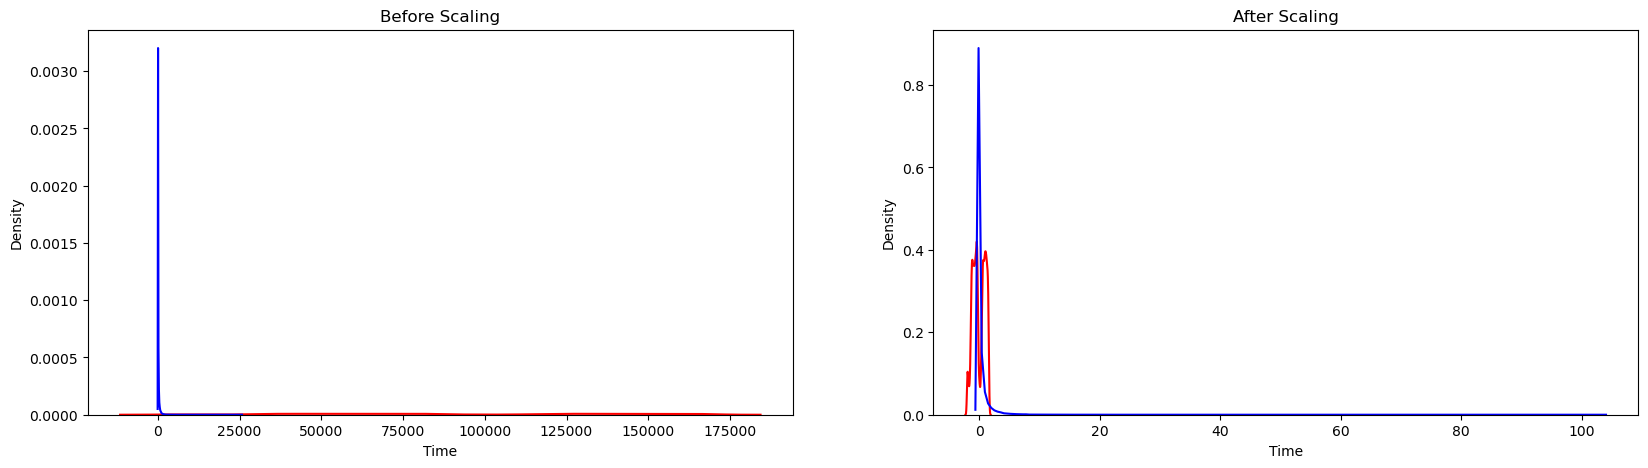

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))

ax1.set_title('Before Scaling')
sns.kdeplot(data['Time'], ax=ax1, color='r')
sns.kdeplot(data['Amount'], ax=ax1, color='b')

ax2.set_title('After Scaling')
sns.kdeplot(X_train['Time'], ax=ax2, color='r')
sns.kdeplot(X_train['Amount'], ax=ax2, color='b')

In [11]:
'''Set score function'''
# 알고리즘으 모델링하기 가장 어려운 거래: 가장 드물게 발생하고 비정상 거래에서 큰 재구성 오차가 발생
# 재구성 오차: 원본 feature 행렬과 차원 축소를 통한 행열 간 차이 제곱의 합
# 차이 제곱 합의 최대-최소 범위 구해서 차이 제곱 합의 범위 정규화: 0 ~ 1 (1 비정상)

def anomalyScores(originalDf, reductedDF):
    loss = np.sum((np.array(originalDf) - np.array(reductedDF))**2, axis=1)
    loss = pd.Series(data=loss, index=originalDf.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [12]:
'''Define evaluation indicator'''

def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds

In [13]:
'''Scatter plot to see classification result using 2 principle components'''

def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:, 0:1], index=xDF.index)
    tempDF = pd.concat((tempDF, yDF), axis=1, join='inner')
    tempDF.columns = ['First Vector', 'Second Vector', 'Label']
    sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=tempDF, fit_reg=False)

    ax = plt.gca()
    ax.set_title("Separation of Observing using " + algoName)  
    

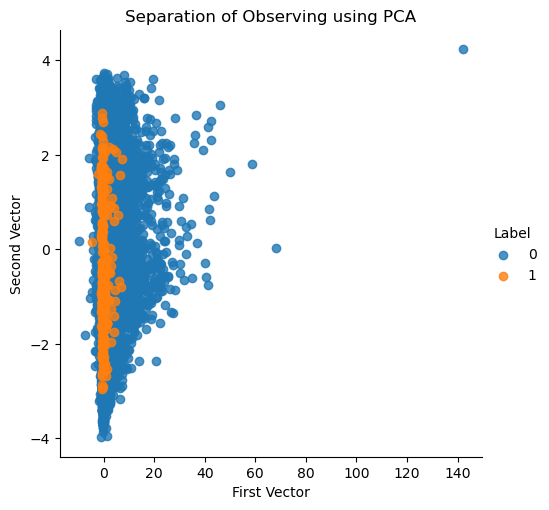

In [14]:
'''PCA for anomaly detection'''
from sklearn.decomposition import PCA

n_components = 30
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

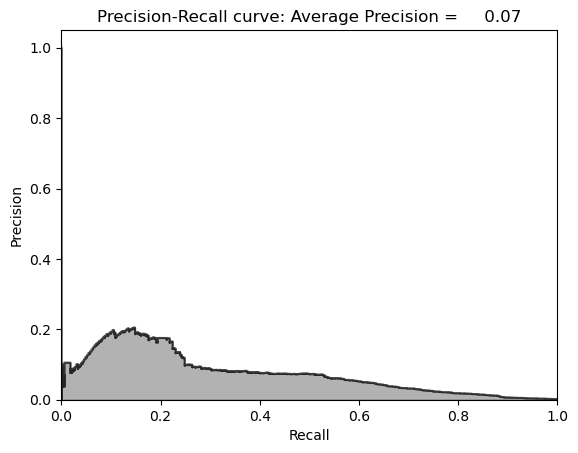

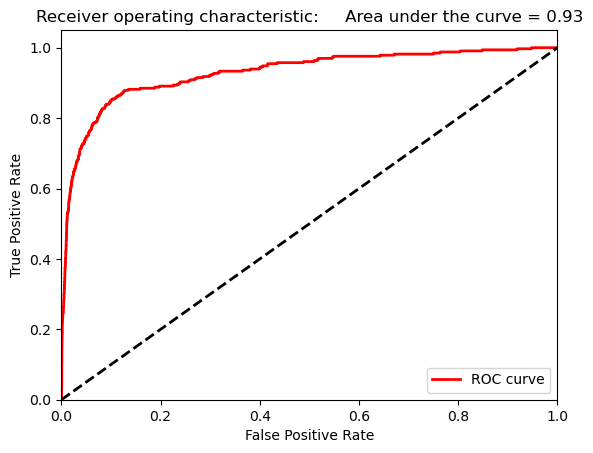

In [15]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

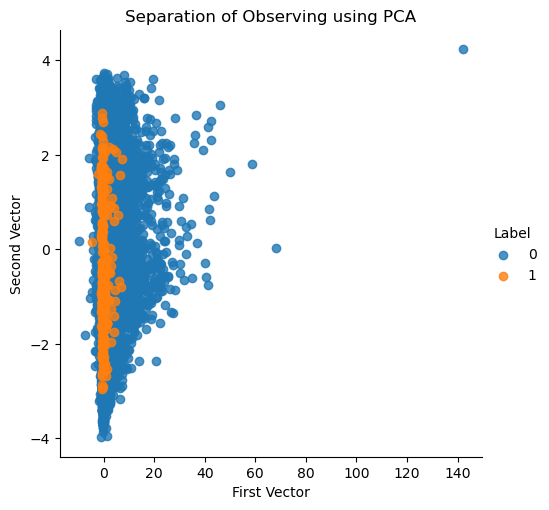

In [16]:
# 27 principal components
from sklearn.decomposition import PCA

n_components = 27
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

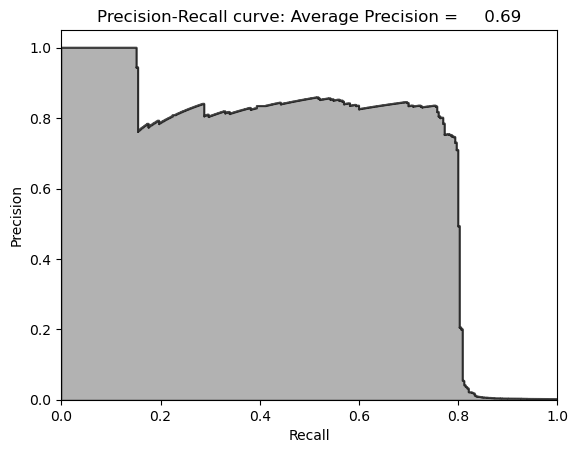

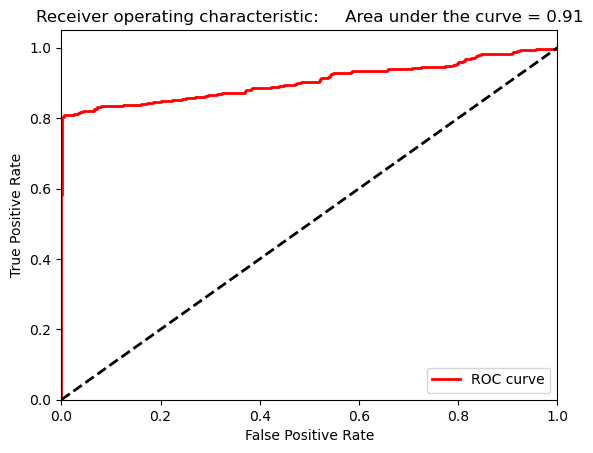

In [17]:
# View plot
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

In [18]:
preds.sort_values(by='anomalyScore', ascending=False, inplace=True)
cutoff=350
predsTop = preds[:cutoff]
print('Precision: ', np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print('Recall: ', np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))
print('Fraud Caught out of 330 Cases: ', predsTop.trueLabel.sum())

Precision:  0.75
Recall:  0.79
Fraud Caught out of 330 Cases:  261


In [19]:
# Select all 330 fraud and 2000 non-fraud
from sklearn.utils import resample
fraud_indices = y_train[y_train==1].index
non_fraud_indices = resample(y_train[y_train==0],n_samples=2000,random_state=2021).index
sample_indices = fraud_indices.append(non_fraud_indices)

In [20]:
 # Log data
cwd = os.getcwd()
log_dir = cwd+"/logs/04_anomaly_detection_credit_card_fraud/"
y_train[sample_indices].to_csv(log_dir+'labels.tsv', sep = '\t', index=False, header=False)

In [21]:
# Write dimensions to TSV
X_train_PCA.loc[sample_indices,:].to_csv(log_dir+'pca_data.tsv', sep = '\t', index=False, header=False)

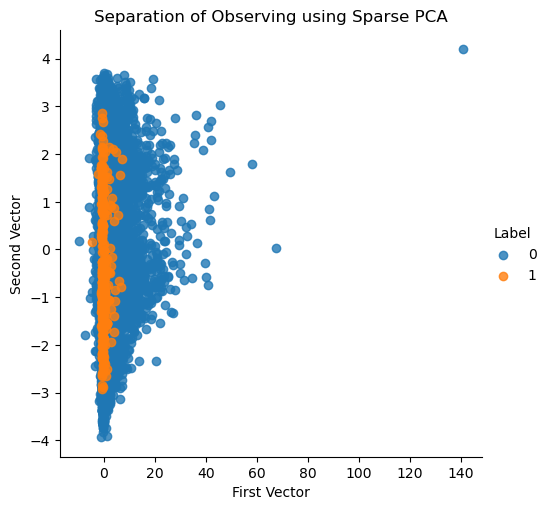

In [22]:
# Sparse PCA
from sklearn.decomposition import SparsePCA

n_components = 27
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=X_train.index)

scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")

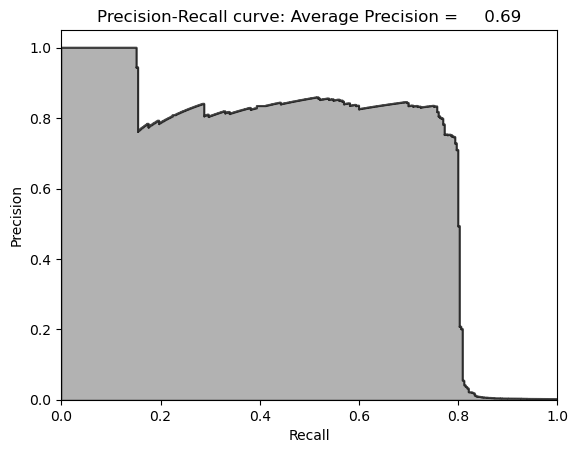

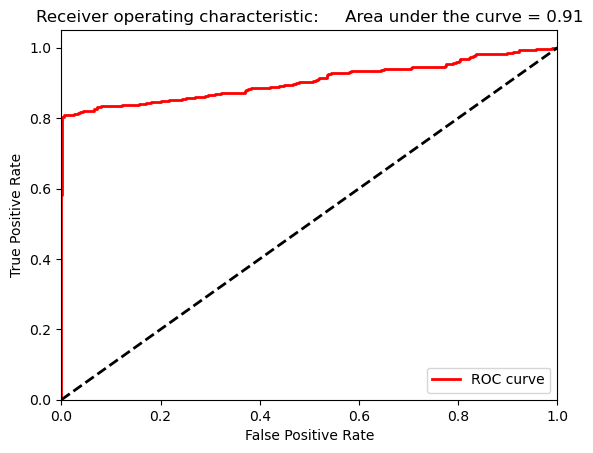

In [23]:
# View plot
X_train_sparsePCA_inverse = np.array(X_train_sparsePCA). \
    dot(sparsePCA.components_) + np.array(X_train.mean(axis=0))
X_train_sparsePCA_inverse = \
    pd.DataFrame(data=X_train_sparsePCA_inverse, index=X_train.index)

anomalyScoresSparsePCA = anomalyScores(X_train, X_train_sparsePCA_inverse)
preds = plotResults(y_train, anomalyScoresSparsePCA, True)

In [24]:
# Write dimensions to CSV
X_train_sparsePCA.loc[sample_indices,:].to_csv(log_dir+'sparse_pca_data.tsv', sep = '\t', index=False, header=False)

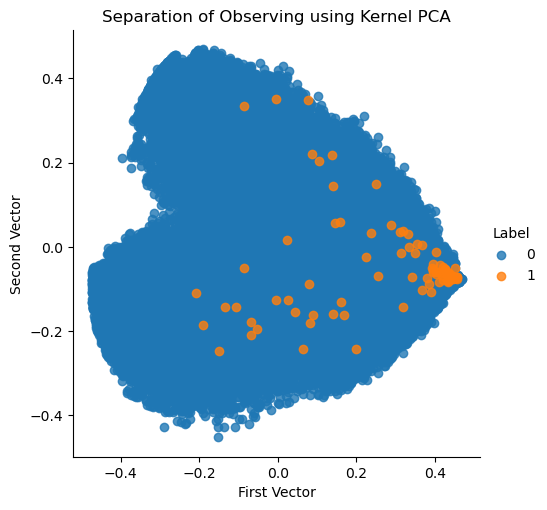

In [25]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

n_components = 27
kernel = 'rbf'
gamma = None
fit_inverse_transform = True
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
                gamma=gamma, fit_inverse_transform= \
                fit_inverse_transform, n_jobs=n_jobs, \
                random_state=random_state)

kernelPCA.fit(X_train.iloc[:2000])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA, \
                                 index=X_train.index)

X_train_kernelPCA_inverse = kernelPCA.inverse_transform(X_train_kernelPCA)
X_train_kernelPCA_inverse = pd.DataFrame(data=X_train_kernelPCA_inverse, \
                                         index=X_train.index)

scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

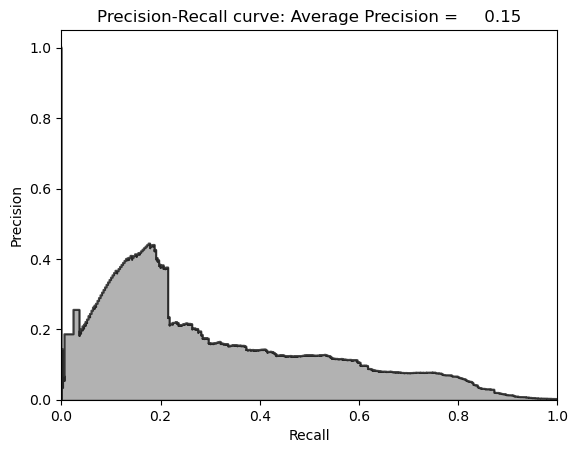

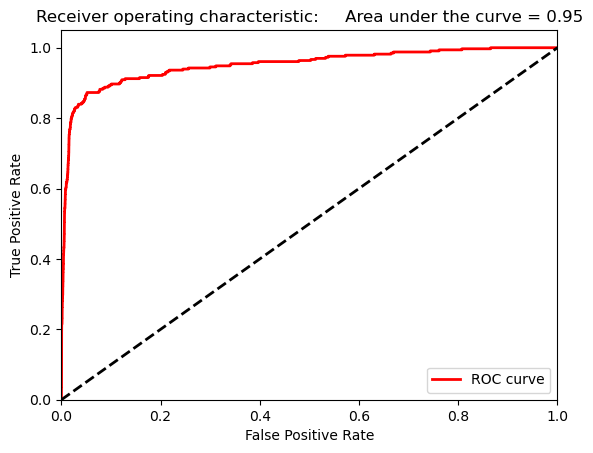

In [26]:
# View plot
anomalyScoresKernelPCA = anomalyScores(X_train, X_train_kernelPCA_inverse)
preds = plotResults(y_train, anomalyScoresKernelPCA, True)

In [27]:
# Write dimensions to CSV
X_train_kernelPCA.loc[sample_indices,:].to_csv(log_dir+'kernel_pca_data.tsv', sep = '\t', index=False, header=False)

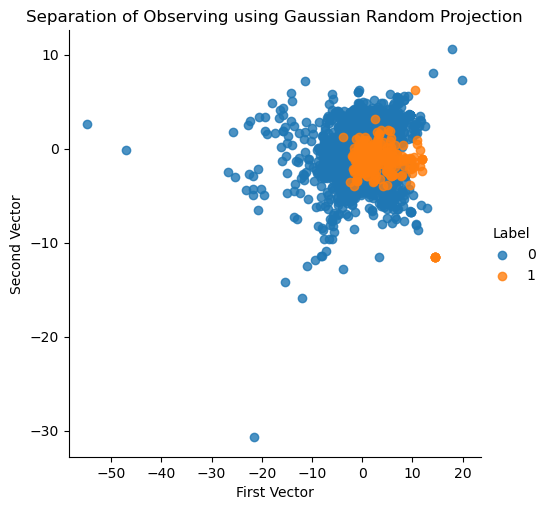

In [28]:
# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 27
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, \
                               random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=X_train.index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

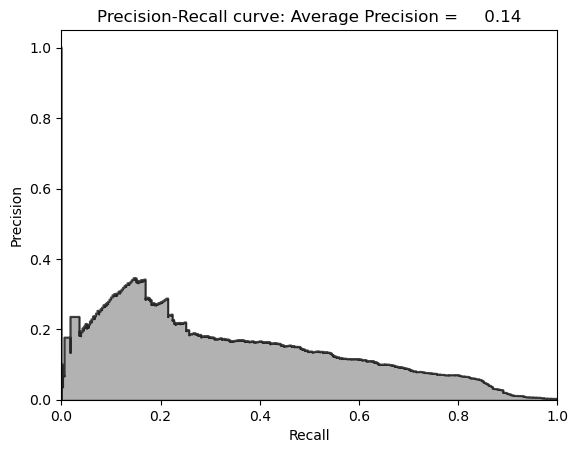

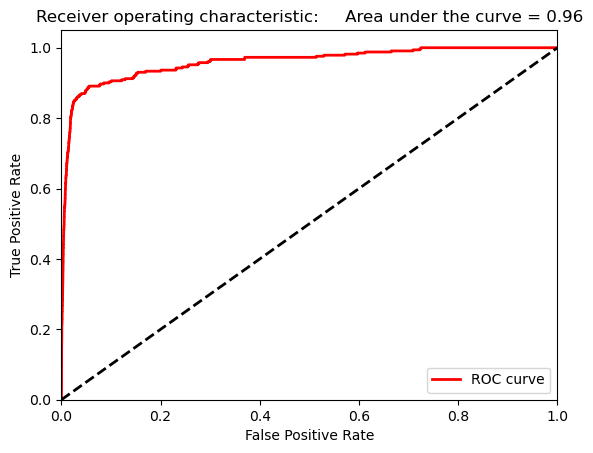

In [29]:
# View plot
X_train_GRP_inverse = np.array(X_train_GRP).dot(GRP.components_)
X_train_GRP_inverse = pd.DataFrame(data=X_train_GRP_inverse, \
                                   index=X_train.index)

anomalyScoresGRP = anomalyScores(X_train, X_train_GRP_inverse)
preds = plotResults(y_train, anomalyScoresGRP, True)

In [30]:
# Write dimensions to CSV
X_train_GRP.loc[sample_indices,:].to_csv(log_dir+'gaussian_random_projection_data.tsv', sep = '\t', index=False, header=False)

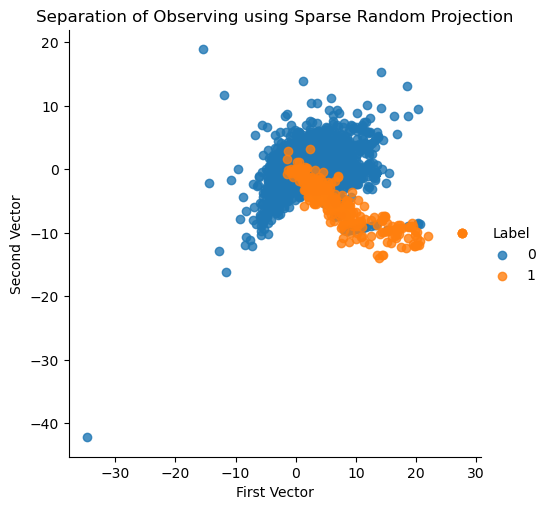

In [31]:
# Sparse Random Projection
from sklearn.random_projection import SparseRandomProjection

n_components = 27
density = 'auto'
eps = .01
dense_output = True
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, \
        density=density, eps=eps, dense_output=dense_output, \
                                random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=X_train.index)

scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

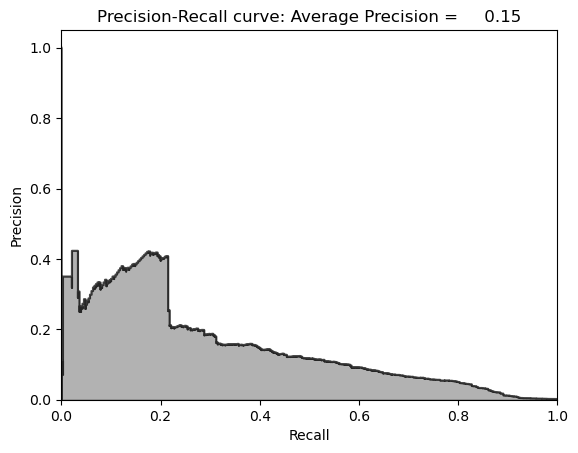

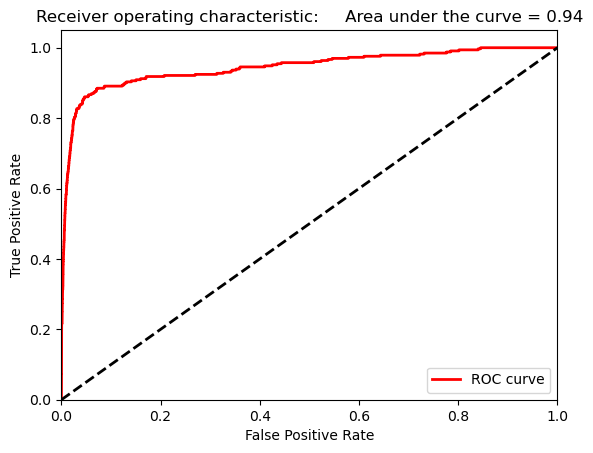

In [32]:
# View plot
X_train_SRP_inverse = np.array(X_train_SRP).dot(SRP.components_.todense())
X_train_SRP_inverse = pd.DataFrame(data=X_train_SRP_inverse, index=X_train.index)

anomalyScoresSRP = anomalyScores(X_train, X_train_SRP_inverse)
plotResults(y_train, anomalyScoresSRP)

In [33]:
# Write dimensions to CSV
X_train_SRP.loc[sample_indices,:].to_csv(log_dir+'sparse_random_projection_data.tsv', sep = '\t', index=False, header=False)

In [34]:
'''
# Mini-batch dictionary learning
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 28
alpha = 1
batch_size = 200
n_iter = 10
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( \
    n_components=n_components, alpha=alpha, batch_size=batch_size, \
    n_iter=n_iter, random_state=random_state)

miniBatchDictLearning.fit(X_train)
X_train_miniBatchDictLearning = \
    miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = \
    pd.DataFrame(data=X_train_miniBatchDictLearning, index=X_train.index)

scatterPlot(X_train_miniBatchDictLearning, y_train, \
            "Mini-batch Dictionary Learning")
'''

'\n# Mini-batch dictionary learning\nfrom sklearn.decomposition import MiniBatchDictionaryLearning\n\nn_components = 28\nalpha = 1\nbatch_size = 200\nn_iter = 10\nrandom_state = 2018\n\nminiBatchDictLearning = MiniBatchDictionaryLearning(     n_components=n_components, alpha=alpha, batch_size=batch_size,     n_iter=n_iter, random_state=random_state)\n\nminiBatchDictLearning.fit(X_train)\nX_train_miniBatchDictLearning =     miniBatchDictLearning.fit_transform(X_train)\nX_train_miniBatchDictLearning =     pd.DataFrame(data=X_train_miniBatchDictLearning, index=X_train.index)\n\nscatterPlot(X_train_miniBatchDictLearning, y_train,             "Mini-batch Dictionary Learning")\n'

In [35]:
'''
# View plot
X_train_miniBatchDictLearning_inverse = \
    np.array(X_train_miniBatchDictLearning). \
    dot(miniBatchDictLearning.components_)

X_train_miniBatchDictLearning_inverse = \
    pd.DataFrame(data=X_train_miniBatchDictLearning_inverse, \
                 index=X_train.index)

anomalyScoresMiniBatchDictLearning = anomalyScores(X_train, \
    X_train_miniBatchDictLearning_inverse)
preds = plotResults(y_train, anomalyScoresMiniBatchDictLearning, True)
'''

'\n# View plot\nX_train_miniBatchDictLearning_inverse =     np.array(X_train_miniBatchDictLearning).     dot(miniBatchDictLearning.components_)\n\nX_train_miniBatchDictLearning_inverse =     pd.DataFrame(data=X_train_miniBatchDictLearning_inverse,                  index=X_train.index)\n\nanomalyScoresMiniBatchDictLearning = anomalyScores(X_train,     X_train_miniBatchDictLearning_inverse)\npreds = plotResults(y_train, anomalyScoresMiniBatchDictLearning, True)\n'

In [37]:
# Write dimensions to CSV
#X_train_miniBatchDictLearning.loc[sample_indices,:].to_csv(log_dir+'dictionary_learning_data.tsv', sep = '\t', index=False, header=False)

C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


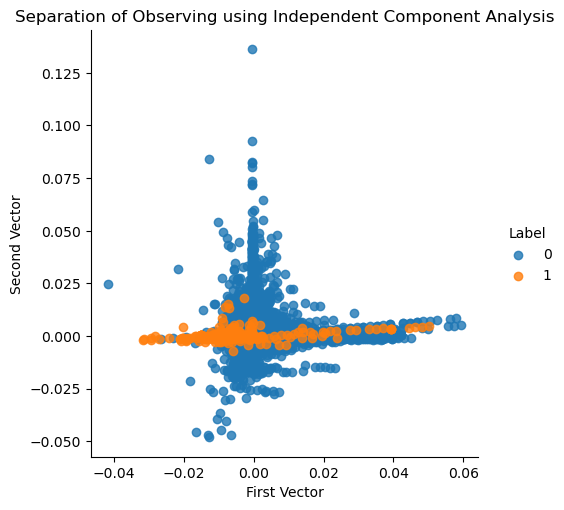

In [38]:
# Independent Component Analysis

from sklearn.decomposition import FastICA

n_components = 27
algorithm = 'parallel'
whiten = True
max_iter = 200
random_state = 2018

fastICA = FastICA(n_components=n_components, \
    algorithm=algorithm, whiten=whiten, max_iter=max_iter, \
    random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=X_train.index)

X_train_fastICA_inverse = fastICA.inverse_transform(X_train_fastICA)
X_train_fastICA_inverse = pd.DataFrame(data=X_train_fastICA_inverse, \
                                       index=X_train.index)

scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")

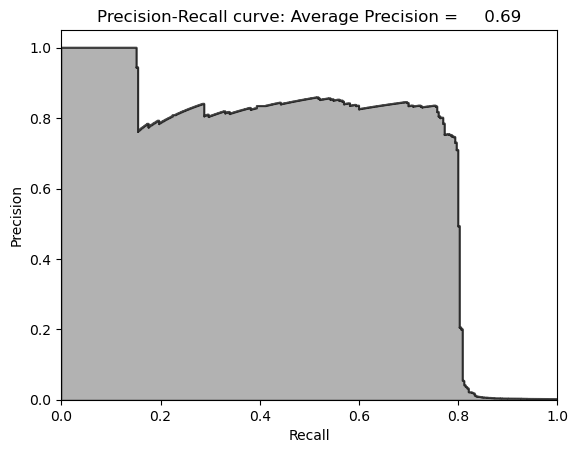

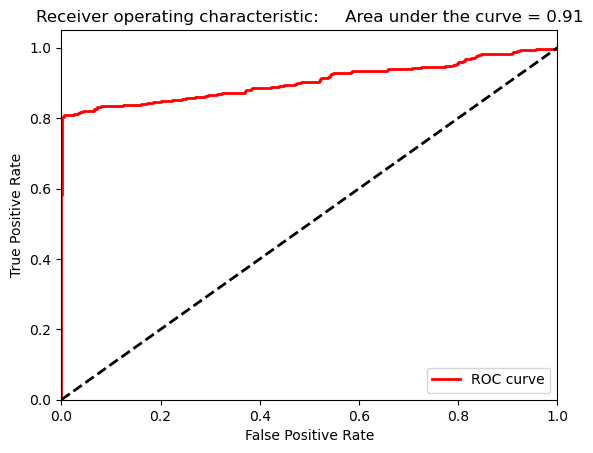

In [39]:
# View plot
anomalyScoresFastICA = anomalyScores(X_train, X_train_fastICA_inverse)
plotResults(y_train, anomalyScoresFastICA)

In [40]:
# Write dimensions to CSV
X_train_fastICA.loc[sample_indices,:].to_csv(log_dir+'independent_component_analysis_data.tsv', sep = '\t', index=False, header=False)

## Evaluate on Test Set

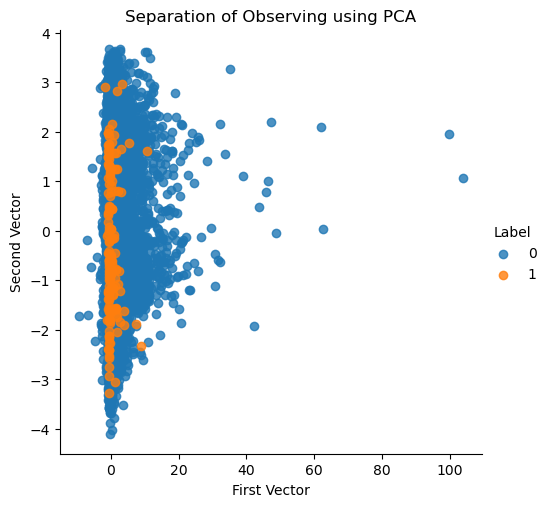

In [41]:
# PCA on Test Set
X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse, \
                                  index=X_test.index)

scatterPlot(X_test_PCA, y_test, "PCA")

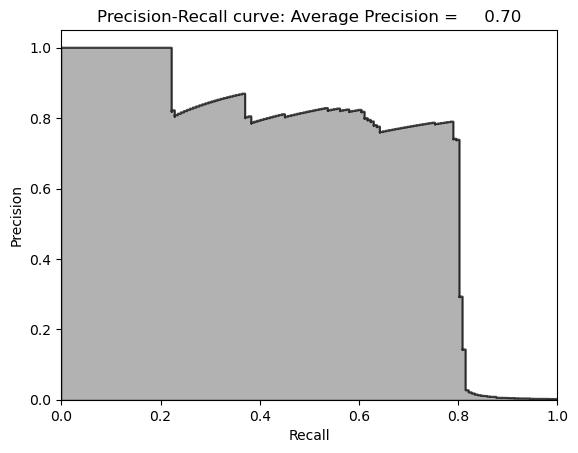

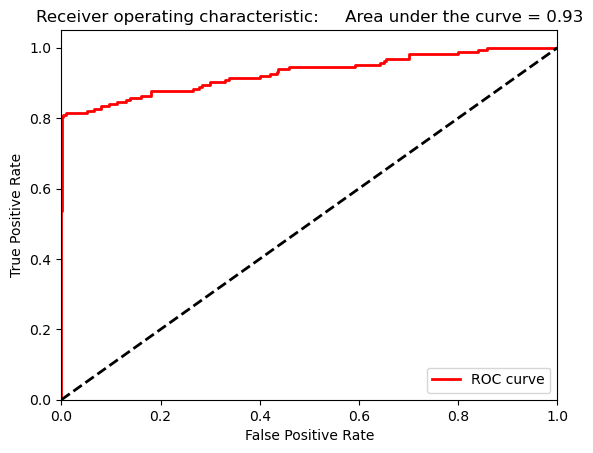

In [42]:
# View plot
anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)
preds = plotResults(y_test, anomalyScoresPCA, True)

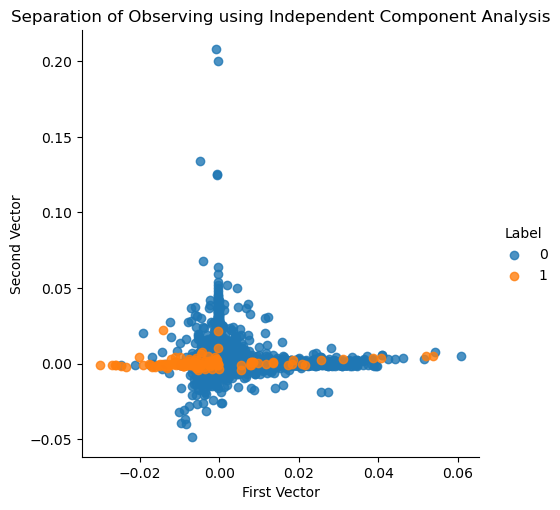

In [43]:
# Independent Component Analysis on Test Set
X_test_fastICA = fastICA.transform(X_test)
X_test_fastICA = pd.DataFrame(data=X_test_fastICA, index=X_test.index)

X_test_fastICA_inverse = fastICA.inverse_transform(X_test_fastICA)
X_test_fastICA_inverse = pd.DataFrame(data=X_test_fastICA_inverse, \
                                      index=X_test.index)

scatterPlot(X_test_fastICA, y_test, "Independent Component Analysis")

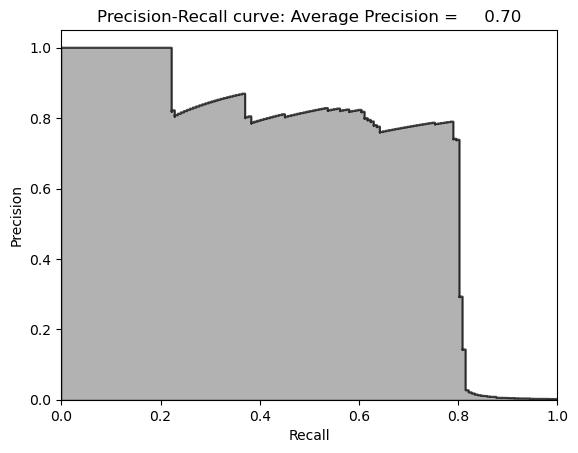

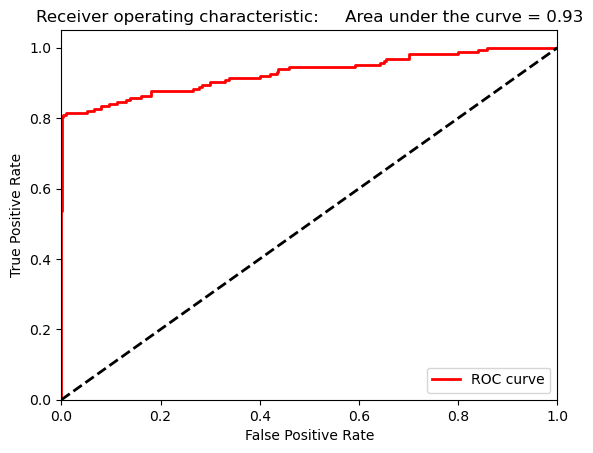

In [44]:
# View plot
anomalyScoresFastICA = anomalyScores(X_test, X_test_fastICA_inverse)
plotResults(y_test, anomalyScoresFastICA)

In [46]:
'''
# Dictionary Learning
X_test_miniBatchDictLearning = miniBatchDictLearning.transform(X_test)
X_test_miniBatchDictLearning = \
    pd.DataFrame(data=X_test_miniBatchDictLearning, index=X_test.index)

scatterPlot(X_test_miniBatchDictLearning, y_test, \
            "Mini-batch Dictionary Learning")
'''

'\n# Dictionary Learning\nX_test_miniBatchDictLearning = miniBatchDictLearning.transform(X_test)\nX_test_miniBatchDictLearning =     pd.DataFrame(data=X_test_miniBatchDictLearning, index=X_test.index)\n\nscatterPlot(X_test_miniBatchDictLearning, y_test,             "Mini-batch Dictionary Learning")\n'

In [47]:
'''
# View plot
X_test_miniBatchDictLearning_inverse = \
    np.array(X_test_miniBatchDictLearning). \
    dot(miniBatchDictLearning.components_)

X_test_miniBatchDictLearning_inverse = \
    pd.DataFrame(data=X_test_miniBatchDictLearning_inverse, \
                 index=X_test.index)

anomalyScoresMiniBatchDictLearning = anomalyScores(X_test, \
    X_test_miniBatchDictLearning_inverse)
preds = plotResults(y_test, anomalyScoresMiniBatchDictLearning, True)
'''

'\n# View plot\nX_test_miniBatchDictLearning_inverse =     np.array(X_test_miniBatchDictLearning).     dot(miniBatchDictLearning.components_)\n\nX_test_miniBatchDictLearning_inverse =     pd.DataFrame(data=X_test_miniBatchDictLearning_inverse,                  index=X_test.index)\n\nanomalyScoresMiniBatchDictLearning = anomalyScores(X_test,     X_test_miniBatchDictLearning_inverse)\npreds = plotResults(y_test, anomalyScoresMiniBatchDictLearning, True)\n'